<a href="https://colab.research.google.com/github/Navya2301/Data-Analysis---Global-Energy-Statistics/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
!pip install kaggle
#from google.colab import files
#files.upload()
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d akhiljethwa/world-energy-statistics

In [102]:
import pandas as pd
df = pd.read_csv('Consumption_Data/Consumption_Total.csv')
df_p = pd.read_csv('Production_Data/Production_Total.csv')
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
df_p['2021'] = pd.to_numeric(df_p['2021'], errors='coerce')
df_p.head()


,Continent,Country,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total_production
0,Africa,Algeria,2.803017355,3.03753686,3.224933779,3.606400483,3.859176003,3.907465538,3.968324779,4.218086334,...,6.510417691,6.561749872,6.696192523,6.910709728,6.830371007,6.755066467,6.474600013,5.972769931,6.656882,238.118858
1,Africa,Angola,0.335098042,0.291293691,0.276262403,0.395407667,0.462550452,0.511269369,0.621432995,0.789428936,...,3.932204112,3.802528446,3.949946917,3.93529724,3.899020984,3.814151292,3.526638469,3.159336901,2.824018,90.852722
2,Africa,Benin,in,0,0,0.00896,0.01573,0.01793,0.01793,0.01569,...,0.000019082,0.00001902,0.000055914,0.00009232,0.000055278,4.64E-05,7.18E-05,6.19E-05,0.000071,0.178363
3,Africa,Botswana,0.008262057,0.008484744,0.009241913,0.008796519,0.00875198,0.009731845,0.010912138,0.010845329,...,0.033334507,0.038240847,0.046562169,0.0419666,0.049654188,0.048447799,0.047231633,0.041991759,0.044393,0.952582
4,Africa,Burkina Faso,0,0,0,0,0,0,0,0,...,0.001106756,0.00096051,0.000987814,0.00143096,0.001455654,0.002066608,0.00190567,0.001859876,0.002055,0.033589


In [103]:
Consumption_2021 = df[['Continent', 'Country', '2021']]

Consumption_2021['2021'] = pd.to_numeric(Consumption_2021['2021'], errors='coerce').fillna(0)
Aggregare_of_energy_consumption_2021 = Consumption_2021.groupby('Continent').sum().reset_index()

total_energy_2021 = Aggregare_of_energy_consumption_2021['2021'].sum()

Aggregare_of_energy_consumption_2021['Percentage'] = (Aggregare_of_energy_consumption_2021['2021'] / total_energy_2021) * 100



<ipython-input-103-9f65522907c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consumption_2021['2021'] = pd.to_numeric(Consumption_2021['2021'], errors='coerce').fillna(0)


<ipython-input-104-8dc0cf8229e8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


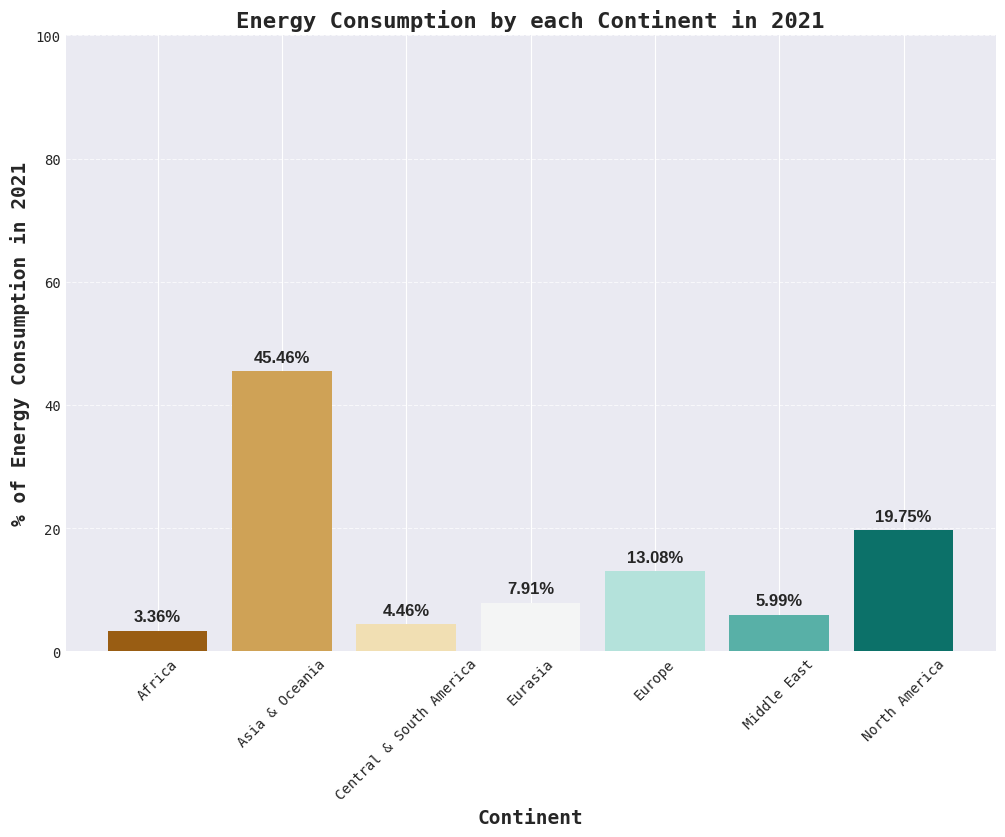

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(12, 8))
bars = plt.bar(Aggregare_of_energy_consumption_2021['Continent'], Aggregare_of_energy_consumption_2021['Percentage'], color=sns.color_palette("BrBG", len(Aggregare_of_energy_consumption_2021)))
plt.xlabel('Continent', fontsize=14, fontweight='bold', fontname = 'monospace')
plt.ylabel('% of Energy Consumption in 2021', fontsize=14, fontweight='bold', fontname = 'monospace')
plt.title('Energy Consumption by each Continent in 2021', fontsize=16, fontweight='bold', fontname = 'monospace')


plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
# Show the plot
plt.xticks(rotation=45, fontsize=10,fontname = 'monospace' )
plt.yticks(fontsize=10,fontname = 'monospace' )
plt.show()

In [105]:
df_p['2021'] = pd.to_numeric(df_p['2021'], errors='coerce')
df_p = df_p.dropna(subset=['2021'])

Asian_consumption_data = df[df['Continent'] == 'Asia & Oceania'][['Country', '2021']]
Top_10_asia = Asian_consumption_data.sort_values(by='2021', ascending=False).head(10)
Total_energy_asia_consumed = Top_10_asia['2021'].sum()

Top_10_asia['Percentage'] = (Top_10_asia['2021'] / Total_energy_asia_consumed) * 100


<ipython-input-108-55404ad3af61>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


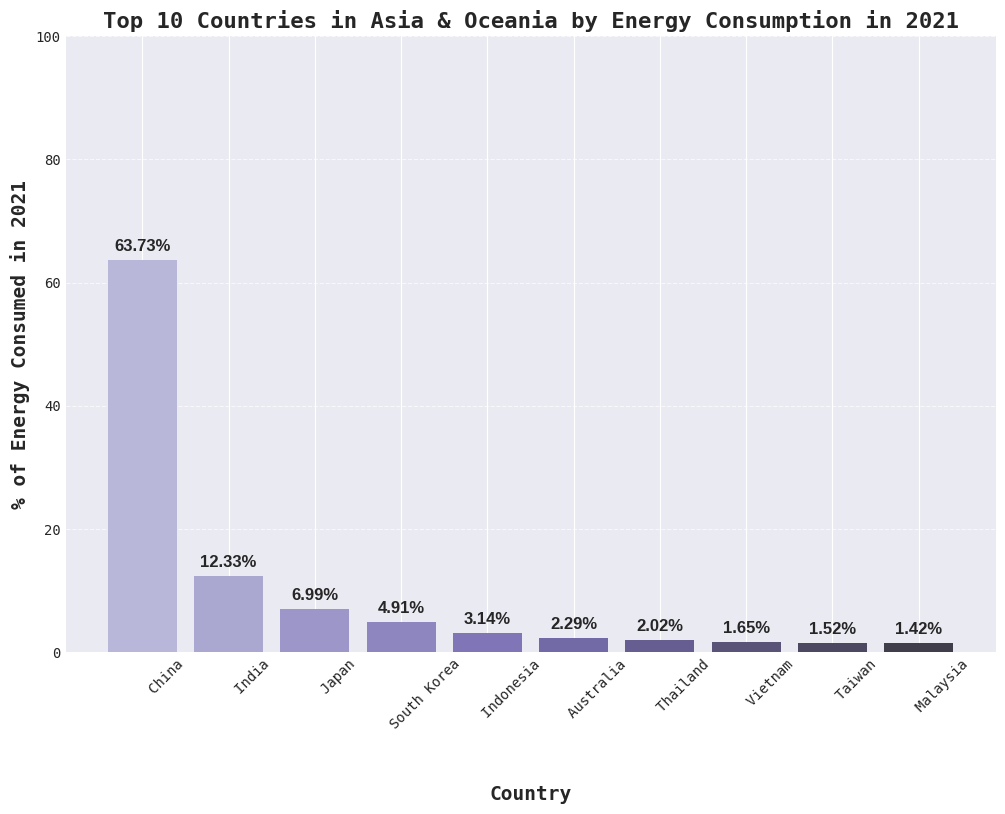

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-darkgrid')


plt.figure(figsize=(12, 8))
bars = plt.bar(Top_10_asia['Country'], Top_10_asia['Percentage'], color=sns.color_palette("Purples_d", len(Top_10_asia)))

plt.xlabel('Country', fontsize=14, fontweight='bold', fontname='monospace')
plt.ylabel('% of Energy Consumed in 2021', fontsize=14, fontweight='bold',fontname='monospace')
plt.title('Top 10 Countries in Asia & Oceania by Energy Consumption in 2021', fontsize=16, fontweight='bold',fontname='monospace')


plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, fontsize=10,fontname='monospace')
plt.yticks(fontsize=10,fontname='monospace')
plt.show()

In [110]:
!git --version
!git config --global user.name "Navya2301"
!git config --global user.email "nr9n8@mst.edu"


git version 2.34.1


In [111]:
!git clone https://github.com/Navya2301/Data-Analysis---Global-Energy-Statistics.git


Cloning into 'Data-Analysis---Global-Energy-Statistics'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [113]:
%cd Data-Analysis---Global-Energy-Statistics


/content/Data-Analysis---Global-Energy-Statistics


In [116]:
!git add Energy_Consumption.ipynb

fatal: pathspec 'Energy_Consumption.ipynb' did not match any files


In [115]:
!git commit -m "initial commit"
!git push origin main

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
